This is a Machine Learning: Linear Regression Project
The Aim of the project is to create a model to predict household prices.

In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from function_file import clean_names

In [87]:
df = pd.read_csv(r"data_in\house_price.csv").rename(columns = clean_names)


In [88]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [89]:
# Check NA
# no NAs
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In the histogram below, we observed that there are House Pricing equal to 0. Further inspect found that there are 49 entries that has a pricing == 0. 
In real world, we could need to find / ask to refine the zero entries.
For this analysis, we could excloud them.

Text(0.5, 1.0, 'Price Histogram')

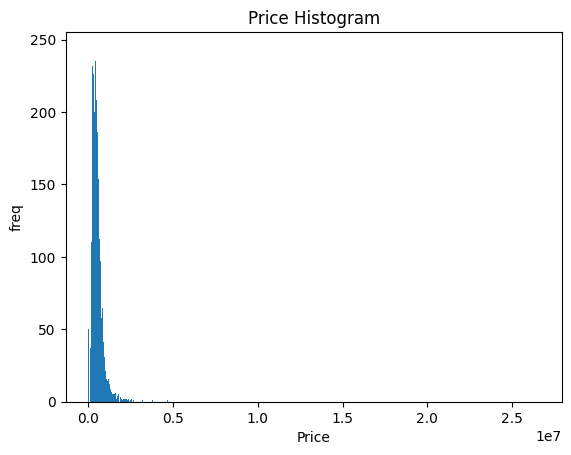

In [90]:
plt.hist(df["price"], bins = 1000)
plt.xlabel('Price')
plt.ylabel('freq')
plt.title('Price Histogram')

In [91]:
price_is_zero_check = df.copy()
price_is_zero_check.loc[price_is_zero_check["price"]==0].count()

date             49
price            49
bedrooms         49
bathrooms        49
sqft_living      49
sqft_lot         49
floors           49
waterfront       49
view             49
condition        49
sqft_above       49
sqft_basement    49
yr_built         49
yr_renovated     49
street           49
city             49
statezip         49
country          49
dtype: int64

In [92]:
df = df.loc[df["price"]!=0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1790e5274a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1790e5279b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1790e19a0c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1790e527fb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1790e558260>],
 'means': []}

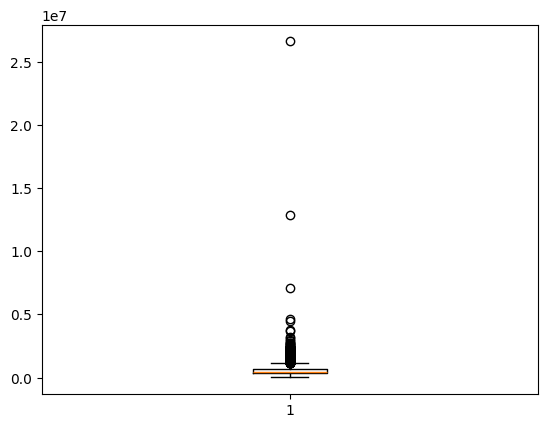

In [93]:
plt.boxplot(df["price"])

In [94]:
print("Minimum Price, ", str(df["price"].idxmin()))
print("Median Price, ", round(df["price"].median()))

Minimum Price,  4351
Median Price,  465000


In [95]:
df_price_trend = df.copy()
df_price_trend["floor_month"] = pd.to_datetime(df_price_trend["date"]).dt.to_period('M')

df_price_trend.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,floor_month
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014-05
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014-05
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014-05
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014-05
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014-05


Numerical Feature Selections:

1. Standing out features includes, sqft_living, bedrooms, 
2. There are 

In [96]:
feat_df = df.drop(columns = ['date', 'street', 'statezip', 'country', 'city', 'condition']).copy()

corr = feat_df.corr()

corr_sort = corr.sort_values(by = ["price"], ascending = False)
print(corr_sort["price"].head(10))

price            1.000000
sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
Name: price, dtype: float64


In [97]:
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.174629,0.317117,-0.066344,0.025846
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,1.000000,-0.037597,0.406436,-0.161281
sqft_basement,0.217782,0.335103,0.295832,0.449671,0.035894,-0.255042,0.088880,0.317117,-0.037597,1.000000,-0.162538,0.046698


Feature Selection: Cities
1. We are making a one-hot encoding to cities and observe coorelation between cities and pricing


- Mercer Island, Bellevue, Medina are correlated to the price outcome.
- The other cities have R2 >|0.1| with House Pricing. This can be due to the popluation of the city, demand, popluar location, tourist spot etc...

In [98]:
city_df = df[['price', 'city']].copy()
city_df= pd.get_dummies(city_df, prefix = ["city_"], columns = ["city"])

corr = city_df.corr()
# Sort by Correlation
corr_sort = corr.sort_values(by = ["price"], ascending = False)

corr_sort.style.background_gradient(cmap='coolwarm')

,price,city__Algona,city__Auburn,city__Beaux Arts Village,city__Bellevue,city__Black Diamond,city__Bothell,city__Burien,city__Carnation,city__Clyde Hill,city__Covington,city__Des Moines,city__Duvall,city__Enumclaw,city__Fall City,city__Federal Way,city__Inglewood-Finn Hill,city__Issaquah,city__Kenmore,city__Kent,city__Kirkland,city__Lake Forest Park,city__Maple Valley,city__Medina,city__Mercer Island,city__Milton,city__Newcastle,city__Normandy Park,city__North Bend,city__Pacific,city__Preston,city__Ravensdale,city__Redmond,city__Renton,city__Sammamish,city__SeaTac,city__Seattle,city__Shoreline,city__Skykomish,city__Snoqualmie,city__Snoqualmie Pass,city__Tukwila,city__Vashon,city__Woodinville,city__Yarrow Point
price,1.000000,-0.020622,-0.091094,0.004919,0.138463,-0.013087,-0.011589,-0.044805,-0.006076,0.083508,-0.043582,-0.050961,-0.026344,-0.032731,0.011765,-0.084298,-0.003494,0.015179,-0.022101,-0.042237,0.034390,-0.012778,-0.056422,0.129952,0.149117,-0.010148,0.016391,-0.002313,-0.029597,-0.021436,0.000169,-0.003051,0.045415,-0.082633,0.050838,-0.042399,0.033815,-0.040646,-0.014799,-0.001332,-0.000865,-0.035451,-0.012121,0.016205,0.033503
city__Mercer Island,0.149117,-0.004492,-0.027088,-0.002008,-0.034749,-0.005684,-0.011577,-0.017174,-0.009441,-0.006030,-0.013073,-0.015390,-0.013073,-0.010465,-0.006668,-0.024573,-0.002008,-0.027962,-0.016305,-0.027805,-0.028040,-0.011752,-0.019778,-0.006668,1.000000,-0.002840,-0.011577,-0.008294,-0.014277,-0.004922,-0.002840,-0.005317,-0.031608,-0.035403,-0.026765,-0.010658,-0.097874,-0.022576,-0.003479,-0.016807,-0.002008,-0.010848,-0.010848,-0.021712,-0.004018
city__Bellevue,0.138463,-0.008508,-0.051300,-0.003803,1.000000,-0.010765,-0.021924,-0.032525,-0.017879,-0.011419,-0.024758,-0.029146,-0.024758,-0.019818,-0.012627,-0.046537,-0.003803,-0.052955,-0.030879,-0.052657,-0.053103,-0.022256,-0.037457,-0.012627,-0.034749,-0.005379,-0.021924,-0.015708,-0.027038,-0.009321,-0.005379,-0.010069,-0.059859,-0.067047,-0.050687,-0.020184,-0.185355,-0.042755,-0.006589,-0.031829,-0.003803,-0.020543,-0.020543,-0.041119,-0.007609
city__Medina,0.129952,-0.001632,-0.009843,-0.000730,-0.012627,-0.002066,-0.004207,-0.006241,-0.003431,-0.002191,-0.004751,-0.005593,-0.004751,-0.003803,-0.002423,-0.008930,-0.000730,-0.010161,-0.005925,-0.010104,-0.010189,-0.004271,-0.007187,1.000000,-0.006668,-0.001032,-0.004207,-0.003014,-0.005188,-0.001788,-0.001032,-0.001932,-0.011486,-0.012865,-0.009726,-0.003873,-0.035566,-0.008204,-0.001264,-0.006107,-0.000730,-0.003942,-0.003942,-0.007890,-0.001460
city__Clyde Hill,0.083508,-0.001476,-0.008902,-0.000660,-0.011419,-0.001868,-0.003804,-0.005644,-0.003102,1.000000,-0.004296,-0.005058,-0.004296,-0.003439,-0.002191,-0.008075,-0.000660,-0.009189,-0.005358,-0.009137,-0.009215,-0.003862,-0.006500,-0.002191,-0.006030,-0.000933,-0.003804,-0.002726,-0.004692,-0.001617,-0.000933,-0.001747,-0.010387,-0.011634,-0.008795,-0.003502,-0.032164,-0.007419,-0.001143,-0.005523,-0.000660,-0.003565,-0.003565,-0.007135,-0.001320
city__Sammamish,0.050838,-0.006553,-0.039513,-0.002929,-0.050687,-0.008292,-0.016887,-0.025052,-0.013771,-0.008795,-0.019070,-0.022450,-0.019070,-0.015264,-0.009726,-0.035845,-0.002929,-0.040787,-0.023784,-0.040558,-0.040902,-0.017143,-0.028850,-0.009726,-0.026765,-0.004143,-0.016887,-0.012099,-0.020825,-0.007179,-0.004143,-0.007755,-0.046106,-0.051642,1.000000,-0.015546,-0.142767,-0.032931,-0.005075,-0.024516,-0.002929,-0.015823,-0.015823,-0.031672,-0.005860
city__Redmond,0.045415,-0.007739,-0.046663,-0.003459,-0.059859,-0.009792,-0.019942,-0.029585,-0.016263,-0.010387,-0.022520,-0.026512,-0.022520,-0.018027,-0.011486,-0.042331,-0.003459,-0.048168,-0.028088,-0.047897,-0.048303,-0.020245,-0.034071,-0.011486,-0.031608,-0.004893,-0.019942,-0.014288,-0.024594,-0.008478,-0.004893,-0.009158,1.000000,-0.060987,-0.046106,-0.018359,-0.168601,-0.038890,-0.005993,-0.028952,-0.003459,-0.018686,-0.018686,-0.037403,-0.006921
city__Kirkland,0.034390,-0.006865,-0.041396,-0.003069,-0.

Feature Selection: Condition

Based on the one hot encoding below for condition.
It shows that condition is not correlated to the house price.
Although, it may affect rental price...

In [99]:
city_df = df[['price', 'condition']].copy()
city_df= pd.get_dummies(city_df, prefix = ["condition_"], columns = ["condition"])

corr = city_df.corr()
# Sort by Correlation
corr_sort = corr.sort_values(by = ["price"], ascending = False)

corr_sort.style.background_gradient(cmap='coolwarm')

,price,condition__1,condition__2,condition__3,condition__4,condition__5
price,1.000000,-0.016191,-0.032762,-0.007265,-0.019757,0.053574
condition__5,0.053574,-0.011661,-0.026579,-0.415627,-0.196191,1.000000
condition__3,-0.007265,-0.047053,-0.107247,1.000000,-0.791633,-0.415627
condition__1,-0.016191,1.000000,-0.003009,-0.047053,-0.022210,-0.011661
condition__4,-0.019757,-0.022210,-0.050625,-0.791633,1.000000,-0.196191
condition__2,-0.032762,-0.003009,1.000000,-0.107247,-0.050625,-0.026579


Collect and assemble all the screened features

1. Collect all screened features together
2. Create a new "correlate_city" column to combine the cities that has correlation with the pricing

- We can see sqft_living (highest correlation factor) is multilinear with sqft_above & bathrooms where |r2|>0.6, hence dropping the multilinear features.

In [100]:
screen_features = ['price','sqft_living','sqft_above','bathrooms','view','sqft_basement','bedrooms','floors', 'waterfront', 'sqft_lot', 'city']

screen_df = df[screen_features].copy()


corr_city = ['Mercer Island', 'Bellevue', 'Medina']

screen_df['correlate_city'] = np.where(screen_df['city'].isin(corr_city), 1,0)

screen_df.drop(columns = ["city"], inplace = True)


corr = screen_df.corr()
# Sort by Correlation
corr_sort = corr.sort_values(by = ["price"], ascending = False)

corr_sort.style.background_gradient(cmap='coolwarm')

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,sqft_lot,correlate_city
price,1.000000,0.445494,0.380661,0.341126,0.242587,0.217782,0.210228,0.152758,0.150083,0.051347,0.216806
sqft_living,0.445494,1.000000,0.875657,0.757213,0.309343,0.449671,0.596053,0.343513,0.107758,0.213268,0.222547
sqft_above,0.380661,0.875657,1.000000,0.687208,0.174629,-0.037597,0.485672,0.522215,0.072502,0.219193,0.163999
bathrooms,0.341126,0.757213,0.687208,1.000000,0.205536,0.295832,0.547612,0.489548,0.063310,0.109331,0.146894
view,0.242587,0.309343,0.174629,0.205536,1.000000,0.317117,0.115080,0.031980,0.347572,0.072527,0.100607
sqft_basement,0.217782,0.449671,-0.037597,0.295832,0.317117,1.000000,0.335103,-0.255042,0.088880,0.035894,0.157179
correlate_city,0.216806,0.222547,0.163999,0.146894,0.100607,0.157179,0.160463,-0.037236,0.034946,-0.005295,1.000000
bedrooms,0.210228,0.596053,0.485672,0.547612,0.115080,0.335103,1.000000,0.176219,-0.005521,0.071138,0.160463
floors,0.152758,0.343513,0.522215,0.489548,0.031980,-0.255042,0.176219,1.000000,0.015804,0.004245,-0.037236
waterfront,0.150083,0.107758,0.072502,0.063310,0.347572,0.088880,-0.005521,0.015804,1.000000,0.017408,0.034946


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply Scaling to Colour graident

screen_features = ['sqft_living','sqft_above','bathrooms','view','sqft_basement','bedrooms','floors', 'waterfront', 'sqft_lot','correlate_city']

X_scaled = screen_df.copy()
X_scaled[screen_features] = scaler.fit_transform(X_scaled[screen_features])

corr = X_scaled.corr()
# Sort by Correlation
corr_sort = corr.sort_values(by = ["price"], ascending = False)

corr_sort.style.background_gradient(cmap='coolwarm')


,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,sqft_lot,correlate_city
price,1.000000,0.445494,0.380661,0.341126,0.242587,0.217782,0.210228,0.152758,0.150083,0.051347,0.216806
sqft_living,0.445494,1.000000,0.875657,0.757213,0.309343,0.449671,0.596053,0.343513,0.107758,0.213268,0.222547
sqft_above,0.380661,0.875657,1.000000,0.687208,0.174629,-0.037597,0.485672,0.522215,0.072502,0.219193,0.163999
bathrooms,0.341126,0.757213,0.687208,1.000000,0.205536,0.295832,0.547612,0.489548,0.063310,0.109331,0.146894
view,0.242587,0.309343,0.174629,0.205536,1.000000,0.317117,0.115080,0.031980,0.347572,0.072527,0.100607
sqft_basement,0.217782,0.449671,-0.037597,0.295832,0.317117,1.000000,0.335103,-0.255042,0.088880,0.035894,0.157179
correlate_city,0.216806,0.222547,0.163999,0.146894,0.100607,0.157179,0.160463,-0.037236,0.034946,-0.005295,1.000000
bedrooms,0.210228,0.596053,0.485672,0.547612,0.115080,0.335103,1.000000,0.176219,-0.005521,0.071138,0.160463
floors,0.152758,0.343513,0.522215,0.489548,0.031980,-0.255042,0.176219,1.000000,0.015804,0.004245,-0.037236
waterfront,0.150083,0.107758,0.072502,0.063310,0.347572,0.088880,-0.005521,0.015804,1.000000,0.017408,0.034946


Here we go, generate Model

Trying 

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# scale_df = scaler.fit_transform(clean_df)

# 'sqft_living','sqft_above','bathrooms','view','sqft_basement','bedrooms','floors', 'waterfront', 'sqft_lot','correlate_city'
# Applying Standarisation to 
scaled_df = scaler.fit_transform(df)

X = df[['sqft_living']]
y = df["price"]

# Split Model into Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lm = LinearRegression()

lm.fit(X_train, y_train)

pred = lm.predict(X_test)
# predictions.reset_index(names = "price")
# lm.score(X_test, y_test)

r2_score(y_test,pred)

ValueError: could not convert string to float: '2014-05-02 00:00:00'

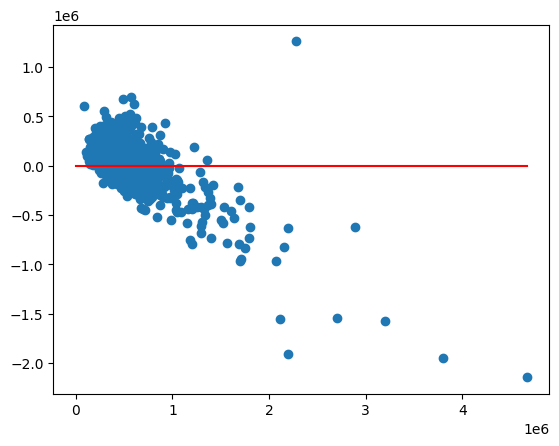

In [119]:
output = pd.DataFrame({"actual_price":y_test, 'predicted_price':pred})
output["error"] = output["predicted_price"] - output["actual_price"]

plt.scatter(output["actual_price"], output["error"])

plt.plot([0, max(output["actual_price"])],[0,0 ], color = "red")

# plt.scatter(pred,y_test)
# plt.plot([0, max(output["actual_price"])],[0, max(output["actual_price"])], color = "red")
# plt.title('Prediction vs Actual Test data, (Red line is 1)')
# plt.xlabel("prediction (Dependent Variable)")
# plt.ylabel("actual")

In [83]:
max(output["actual_price"])

4668000.0

In [38]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [19]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coef"])
cdf

,Coef
sqft_living,189.964681
sqft_above,76.952144
bathrooms,-22173.509350
view,51998.199695
sqft_basement,113.012537
bedrooms,-57781.794368
floors,54335.672695
waterfront,427381.930884
sqft_lot,-0.405265
correlate_city,252218.503215


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scale_df = scaler.fit_transform(clean_df)



# clean_df = pd.get_dummies(clean_df, prefix = ["city_"], columns = ["city"])

In [19]:
clean_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

Let's Sort the correlation against price (Dependent Variable)

Features Selection:
1. sqft_living


In [16]:
corr_sort = corr.sort_values(by = ["price"], ascending = False)
corr_sort.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city__Algona,city__Auburn,city__Beaux Arts Village,city__Bellevue,city__Black Diamond,city__Bothell,city__Burien,city__Carnation,city__Clyde Hill,city__Covington,city__Des Moines,city__Duvall,city__Enumclaw,city__Fall City,city__Federal Way,city__Inglewood-Finn Hill,city__Issaquah,city__Kenmore,city__Kent,city__Kirkland,city__Lake Forest Park,city__Maple Valley,city__Medina,city__Mercer Island,city__Milton,city__Newcastle,city__Normandy Park,city__North Bend,city__Pacific,city__Preston,city__Ravensdale,city__Redmond,city__Renton,city__Sammamish,city__SeaTac,city__Seattle,city__Shoreline,city__Skykomish,city__Snoqualmie,city__Snoqualmie Pass,city__Tukwila,city__Vashon,city__Woodinville,city__Yarrow Point
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,-0.020167,-0.089375,0.005049,0.134828,-0.016677,-0.010633,-0.046045,-0.005313,0.066867,-0.044063,-0.049503,-0.025194,-0.033918,0.012220,-0.084757,-0.003321,0.016139,-0.022357,-0.040837,0.036375,-0.016303,-0.055803,0.129795,0.140007,-0.009876,0.017201,-0.005022,-0.028337,-0.020944,0.000388,-0.002624,0.047612,-0.080926,0.047604,-0.043327,0.035642,-0.038682,-0.014453,-0.003477,-0.000705,-0.034427,-0.011219,0.016361,0.033640
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,-0.018178,-0.024804,-0.009942,0.148424,-0.012689,0.015891,-0.043017,0.018218,0.075316,-0.034977,-0.038336,0.002213,-0.017620,0.036935,-0.016136,-0.009483,0.068289,-0.003610,-0.033598,0.025677,0.013252,-0.008080,0.099855,0.162803,-0.019151,0.048521,-0.002998,-0.015668,-0.023209,0.003046,0.019194,0.084903,-0.006658,0.142635,-0.038112,-0.232573,-0.062733,-0.020760,0.074974,-0.000602,-0.035822,-0.020647,0.087066,0.010205
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,-0.008367,0.008094,-0.011756,0.106131,-0.001001,0.012879,-0.053222,0.030390,0.039497,-0.020105,-0.041651,0.020440,-0.000303,0.044557,-0.011031,-0.005256,0.070544,-0.004929,-0.013566,0.030537,-0.002952,0.037597,0.090456,0.127431,-0.013845,0.076165,-0.007964,0.006315,-0.012846,0.009138,0.035576,0.124184,0.019192,0.193036,-0.036218,-0.325732,-0.064932,-0.013945,0.113295,-0.005427,-0.037820,-0.007024,0.107353,0.022081
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,-0.010978,-0.017430,-0.007730,0.096217,-0.023210,0.029395,-0.067579,0.000853,0.028289,-0.023536,-0.043077,0.013111,-0.040131,0.025449,-0.012262,-0.003026,0.113674,0.005566,-0.005649,0.043793,0.012468,0.034564,0.055266,0.118618,-0.010933,0.038433,-0.011751,0.005241,-0.009337,0.005700,-0.006232,0.065146,-0.012914,0.106008,-0.044382,-0.182717,-0.076141,-0.016108,0.075567,0.011086,-0.050515,-0.031239,0.044429,-0.008406
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,-0.010199,-0.029638,-0.004559,0.049939,-0.013690,-0.026283,0.049267,0.006905,0.036329,-0.030035,0.065190,-0.029680,0.036849,0.002018,-0.015221,-0.004559,-0.039604,-0.020864,-0.054763,-0.019804,0.010576,-0.037325,0.013455,0.107856,-0.006449,-0.026283,0.043254,-0.002782,-0.011174,-0.006449,-0.012071,-0.055251,-0.034896,-0.011847,-0.006983,0.052671,-0.002771,-0.007899,0.006602,-0.004559,-0.017570,0.102412,-0.044144,0.009830
sqft_basement,0.210427,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125,-0.022183,-0.066510,0.001205,0.110874,-0.024474,0.009055,0.009591,-0.018643,0.082931,-0.035240,-0.002186,-0.033377,-0.036004,-0.006118,-0.012994,-0.009916,0.010676,0.001665,-0.044526,-0.003438,0.032986,-0.086608,0.039198,0.101147,-0.014025,-0.040789,0.008572,-0.044246,-0.024302,-